In [81]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning imports
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor

# Importing and cleaning up test data

In [21]:
# Reading the train data into dataframe
train_df = pd.read_csv('./codetest_train.txt',delimiter='\t')

In [22]:
# viewing dataframe
# some of the columns are strings so need to find them
train_df.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [23]:
# Dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 255 entries, target to f_253
dtypes: float64(251), object(4)
memory usage: 9.8+ MB


In [24]:
# Basic stats on training data indicates that most features are missing around 100 values
# Deleting rows where NaN values exist leaves too few data points to make a robust model
train_df.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


In [25]:
# NaN values are filled with median of each column. Median is used as is less prone to outlier effects than mean
train_df = train_df.fillna(train_df.median())

In [26]:
train_df.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.143878,-0.000638,0.002484,0.029220,-0.005277,-0.006764,0.005331,0.001443,-0.001412,0.009899,...,0.013753,0.004170,0.023325,-0.018798,-0.009855,0.016628,-0.004648,0.016918,-0.001277,0.010424
std,5.259896,0.989993,0.990717,1.009916,0.981396,0.996888,0.986997,0.994221,0.987737,0.977676,...,0.992399,0.985602,0.987850,0.994290,0.979483,0.999735,0.981611,0.993415,0.993730,0.997181
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.660250,-0.673250,-0.633000,-0.640000,-0.670000,-0.646000,-0.650000,-0.666000,-0.648500,...,-0.649000,-0.653250,-0.652000,-0.672000,-0.648000,-0.628250,-0.662000,-0.637000,-0.679250,-0.662750
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.662250,0.664250,0.702250,0.654250,0.636250,0.637250,0.657250,0.653250,0.683000,...,0.661000,0.653000,0.687500,0.636000,0.632000,0.694250,0.643750,0.676250,0.661250,0.689250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


In [80]:
# Some of the columns are non-floats so excluded them. There is already 250 variables in this set
# If there was less I might of tried to use the non-floats
train_df= train_df.select_dtypes(exclude=['object'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 251 entries, target to f_253
dtypes: float64(251)
memory usage: 9.6 MB


In [28]:
train_df.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,-0.008,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,-0.035,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [29]:
# seperating data into variables and target arrays
y =train_df.iloc[:,:1].values
X =train_df.iloc[:,1:].values

In [30]:
# Checking the data type and shape of X and y arrays
X.dtype

dtype('float64')

In [32]:
y.dtype

dtype('float64')

In [35]:
X.shape

(5000L, 250L)

In [36]:
y.shape

(5000L, 1L)

In [52]:
# Splitting training data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Importing and cleaning up of test data

In [106]:
# Reading the test data into dataframe
test_df = pd.read_csv('./codetest_test.txt',delimiter='\t')
test_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.724,0.206,0.449,1.305,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.946,2.001,-1.491,-0.162,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,NaN,-0.378,-0.645,0.713,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.136,0.051,-0.097,NaN,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.525,0.326,-0.590,-0.287,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378


In [107]:
test_df.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,972.000000,983.000000,983.000000,982.000000,978.000000,984.000000,982.000000,978.000000,980.000000,979.000000,...,973.000000,976.000000,985.000000,979.000000,986.000000,980.000000,981.000000,978.000000,979.000000,985.000000
mean,-0.035218,0.100792,0.021098,0.005391,-0.042323,-0.013639,-0.033501,0.025939,0.029102,0.000221,...,0.022764,-0.071009,0.038268,0.053555,-0.021745,-0.028499,-0.025662,0.003518,-0.007108,-0.017024
std,0.978034,0.989471,1.028476,0.989312,1.016019,1.038796,1.018101,0.971878,0.962718,0.999688,...,0.973855,1.010040,0.981809,1.026265,1.028849,0.941963,1.045912,1.001211,0.998150,1.015624
min,-2.997000,-2.760000,-3.517000,-3.017000,-3.332000,-3.241000,-3.441000,-2.828000,-2.911000,-4.457000,...,-2.801000,-4.186000,-3.156000,-4.145000,-3.400000,-2.860000,-3.364000,-2.959000,-2.985000,-3.491000
25%,-0.679000,-0.575000,-0.654000,-0.671750,-0.706000,-0.730000,-0.752000,-0.666000,-0.569000,-0.715000,...,-0.586000,-0.752750,-0.611000,-0.688500,-0.762500,-0.658500,-0.730000,-0.671250,-0.684500,-0.722000
50%,-0.045500,0.149000,0.033000,0.027000,-0.030500,-0.024500,-0.082500,0.017500,0.007500,-0.035000,...,0.020000,-0.099000,0.050000,0.041000,-0.013000,-0.035000,-0.051000,0.030500,0.010000,-0.009000
75%,0.671500,0.715000,0.697000,0.661750,0.594000,0.730500,0.659000,0.681500,0.716500,0.679000,...,0.653000,0.586750,0.691000,0.726000,0.649000,0.587000,0.717000,0.670250,0.679500,0.655000
max,3.022000,3.188000,3.122000,2.927000,3.462000,2.873000,3.730000,3.176000,2.863000,3.023000,...,3.041000,3.496000,3.019000,3.971000,3.047000,3.351000,3.336000,3.083000,2.727000,3.413000


In [108]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 254 entries, f_0 to f_253
dtypes: float64(250), object(4)
memory usage: 1.9+ MB


In [109]:
test_df= test_df.select_dtypes(exclude=['object'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 250 entries, f_0 to f_253
dtypes: float64(250)
memory usage: 1.9 MB


In [110]:
test_df = test_df.fillna(test_df.median())
test_df.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.035506,0.101612,0.021300,0.005780,-0.042063,-0.013813,-0.034383,0.025753,0.028670,-0.000519,...,0.022689,-0.071681,0.038444,0.053291,-0.021623,-0.028629,-0.026143,0.004112,-0.006749,-0.016904
std,0.964232,0.981036,1.019688,0.980363,1.004771,1.030445,1.008908,0.961118,0.953037,0.989138,...,0.960605,0.997843,0.974411,1.015422,1.021615,0.932487,1.035924,0.990133,0.987606,1.007970
min,-2.997000,-2.760000,-3.517000,-3.017000,-3.332000,-3.241000,-3.441000,-2.828000,-2.911000,-4.457000,...,-2.801000,-4.186000,-3.156000,-4.145000,-3.400000,-2.860000,-3.364000,-2.959000,-2.985000,-3.491000
25%,-0.668250,-0.570000,-0.639500,-0.659500,-0.697500,-0.720250,-0.737000,-0.657250,-0.558750,-0.698500,...,-0.575000,-0.741250,-0.598750,-0.677750,-0.750000,-0.635500,-0.696750,-0.664250,-0.663250,-0.696500
50%,-0.045500,0.149000,0.033000,0.027000,-0.030500,-0.024500,-0.082500,0.017500,0.007500,-0.035000,...,0.020000,-0.099000,0.050000,0.041000,-0.013000,-0.035000,-0.051000,0.030500,0.010000,-0.009000
75%,0.654000,0.695250,0.686500,0.649000,0.573000,0.716000,0.642500,0.653000,0.686000,0.673000,...,0.628250,0.570250,0.683000,0.713000,0.640750,0.570250,0.698500,0.636500,0.658250,0.643250
max,3.022000,3.188000,3.122000,2.927000,3.462000,2.873000,3.730000,3.176000,2.863000,3.023000,...,3.041000,3.496000,3.019000,3.971000,3.047000,3.351000,3.336000,3.083000,2.727000,3.413000


In [113]:
X_testdf = test_df.values
X_testdf.shape

(1000L, 250L)

# Basic linear regression

In [39]:
# Attempt at regular linear regression (crude)
lin = LinearRegression()

In [41]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
y_train_pred = lin.predict(X_train)
y_test_pred = lin.predict(X_test)

In [44]:
print 'MSE train: %.3f, test: %.3f' %(
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred))

MSE train: 12.972, test: 14.758


In [46]:
print 'R^2 train: %.3f, test: %.3f' %(
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred))

R^2 train: 0.532, test: 0.462


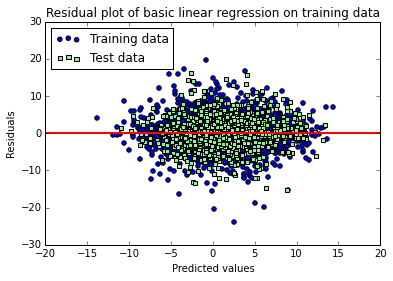

In [51]:
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=20, lw=2, color='red')
plt.xlim([-20,20])
plt.title('Residual plot of basic linear regression on training data')

# Non-linear regression

In [75]:
regr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_train_quad, X_test_quad, y_train, y_test = train_test_split(X_quad,y)

In [76]:
regr.fit(X_train_quad,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
y_test_pred_quad = regr.predict(X_test_quad)

In [78]:
print 'R^2 test: %.3f:' % r2_score(y_test,y_test_pred_quad)

R^2 test: 0.154:


Safe to say that this is a linear regression problem

# Dealing with outliers to try and improve linear model preformence

In [193]:
# reassigning train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [194]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=1500,
                        residual_metric = lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold = 10.0,
                        random_state=0)
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=1500, random_state=0,
        residual_metric=<function <lambda> at 0x0000000021B54CF8>,
        residual_threshold=10.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [195]:
inlier_mask = ransac.inlier_mask_

outlier_amt = 0
for i in inlier_mask:
    if i == False:
        outlier_amt += 1
        
print 'The amount of outliers from this threshold is %.0f out of %.0f' % (outlier_amt,len(X_train))

The amount of outliers from this threshold is 67 out of 3750


In [196]:
X_train = X_train[inlier_mask]

In [197]:
y_train = y_train[inlier_mask]

In [198]:
y_train_pred_ransac = ransac.predict(X_train)
y_test_pred_ransac = ransac.predict(X_test)

In [199]:
print 'R^2 train: %.3f, test: %.3f' %(
r2_score(y_train, y_train_pred_ransac),
r2_score(y_test, y_test_pred_ransac))


R^2 train: 0.593, test: 0.450


In [200]:
print 'MSE train: %.3f, test: %.3f' %(
mean_squared_error(y_train, y_train_pred_ransac),
mean_squared_error(y_test, y_test_pred_ransac))


MSE train: 10.062, test: 14.740


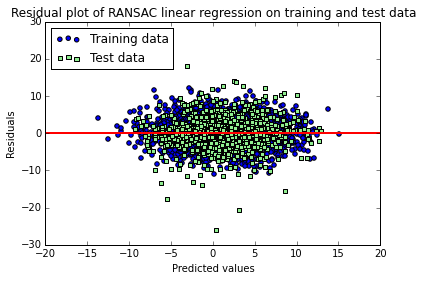

In [201]:
plt.scatter(y_train_pred_ransac,  y_train_pred_ransac - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred_ransac,  y_test_pred_ransac - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=20, lw=2, color='red')
plt.xlim([-20,20])
plt.title('Residual plot of RANSAC linear regression on training and test data')

There is a large difference between our training and testing scores which indicates that the model is overfitting to our training data, we can use regularisation to penalise the overfitting